170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
391/391 - 18s - 47ms/step - accuracy: 0.4350 - loss: 1.5503 - val_accuracy: 0.5776 - val_loss: 1.1794
Epoch 2/30
391/391 - 2s - 5ms/step - accuracy: 0.5902 - loss: 1.1567 - val_accuracy: 0.6624 - val_loss: 0.9534
Epoch 3/30
391/391 - 2s - 5ms/step - accuracy: 0.6614 - loss: 0.9592 - val_accuracy: 0.7117 - val_loss: 0.8364
Epoch 4/30
391/391 - 2s - 5ms/step - accuracy: 0.7088 - loss: 0.8298 - val_accuracy: 0.7268 - val_loss: 0.7815
Epoch 5/30
391/391 - 2s - 5ms/step - accuracy: 0.7377 - loss: 0.7505 - val_accuracy: 0.7501 - val_loss: 0.7224
Epoch 6/30
391/391 - 2s - 5ms/step - accuracy: 0.7588 - loss: 0.6904 - val_accuracy: 0.7684 - val_loss: 0.6701
Epoch 7/30
391/391 - 2s - 5ms/step - accuracy: 0.7774 - loss: 0.6380 - val_accuracy: 0.7649 - val_loss: 0.6768
Epoch 8/30
391/391 - 2s - 5ms/step - accuracy: 0.7933 - loss: 0.5870 - val_accuracy: 0.7813 - val_loss: 0.6426
Epoch 9/30
391/391 - 2s - 5ms/step - accuracy: 0.8070 - loss: 0.5466 - val_accuracy: 0.7826 - val_loss: 0.6407

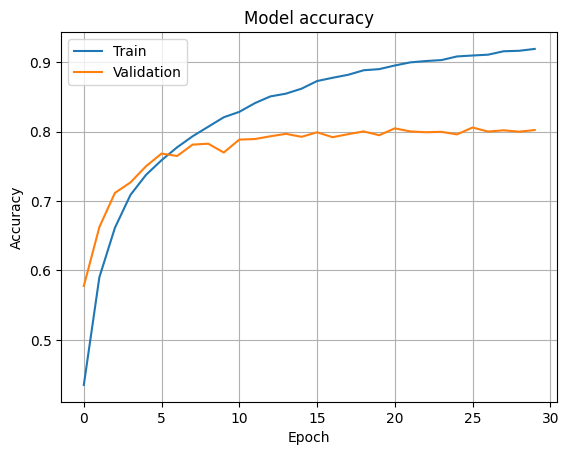

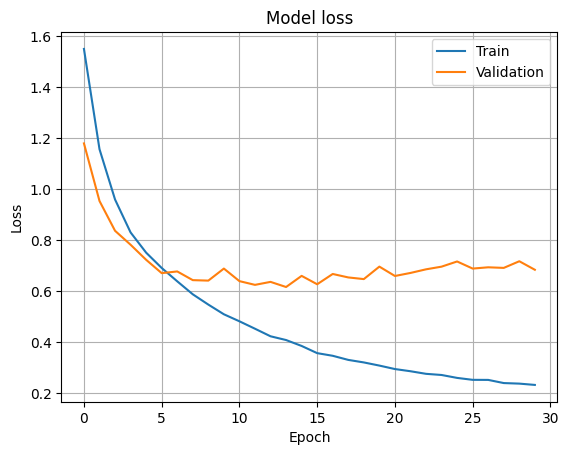

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# CIFAR 데이터셋을 읽고 신경망에 입력할 형태로 변환
x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# 신경망 모델 설계
cnn = Sequential()
cnn.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
cnn.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25))
cnn.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
cnn.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(512, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10, activation='softmax'))

# 신경망 모델 학습
cnn.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
hist = cnn.fit(x_train, y_train, batch_size=128, epochs=30, validation_data=(x_test, y_test), verbose=2)

res=cnn.evaluate(x_test, y_test, verbose=0)
print('정확률은', res[1]*100)

# 정확률 그래프
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.grid()
plt.show()

# 손실함수 그래프
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.grid()
plt.show()

# 모델 저장
cnn.save('my_cnn.h5')